In [15]:
import ds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.colors import ListedColormap
import math

df = pd.read_csv("Cleaned_DF.csv")

In [16]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [17]:
df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,route
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,2.0,0.0,1.0,8.0
1,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,6.0,0.0,2.0,2.0
2,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,-1.0,1.0,0.0,2.0,8.0
3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,-1.0,1.0,0.0,2.0,8.0
4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,6.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7669,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,-1.0,1.0,98.0,1.0,7.0
7670,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,7.0,1499.0,2.0,3.0
7671,0.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1.0,7.0,1500.0,2.0,2.0
7672,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,-1.0,5.0,608.0,2.0,7.0


In [18]:
features = ['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Deck','Num','Side','route']

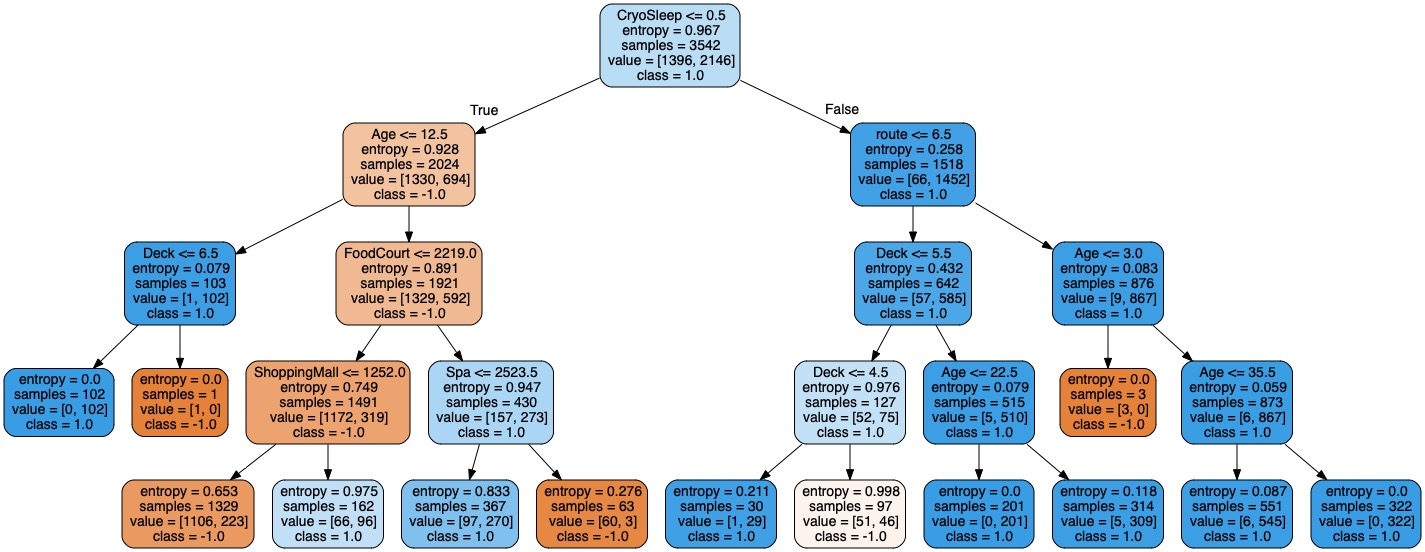

test size:  3542 , total errors in test: 12.62%
index = predicted, columns = factual, in %:
         -1        1
-1   34.472  7.67928
 1  4.94071   52.908


In [19]:
data_exploration_tree = ds.divide_frame(dataf = df[df['route']>3.5],columns = features,teacher_column = "Transported",classifier = 'Tree', criterion_tree = "entropy", depth = 4, random_state_sample = 5,random_state_ppn = 2, fraction = 1)

3.5 < route

1519 CryoSleep == 1 ==> 1.0 [66,1453]

In [20]:
mask = (df['CryoSleep'] == 0)&(df['route']>3.5)

In [21]:
df_rest = df[mask]

In [22]:
df_rest.drop("CryoSleep", axis = 1, inplace = True)

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
df_rest.shape

(2024, 12)

In [24]:
df_rest

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,route
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,2.0,0.0,1.0,8.0
2,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,-1.0,1.0,0.0,2.0,8.0
3,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,-1.0,1.0,0.0,2.0,8.0
11,45.0,0.0,39.0,7295.0,589.0,110.0,124.0,1.0,2.0,1.0,1.0,7.0
12,32.0,0.0,73.0,0.0,1123.0,0.0,113.0,1.0,6.0,1.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7667,32.0,0.0,1.0,1146.0,0.0,50.0,34.0,-1.0,1.0,97.0,1.0,8.0
7668,30.0,0.0,0.0,3208.0,0.0,2.0,330.0,1.0,1.0,97.0,1.0,8.0
7669,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,-1.0,1.0,98.0,1.0,7.0
7672,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,-1.0,5.0,608.0,2.0,7.0


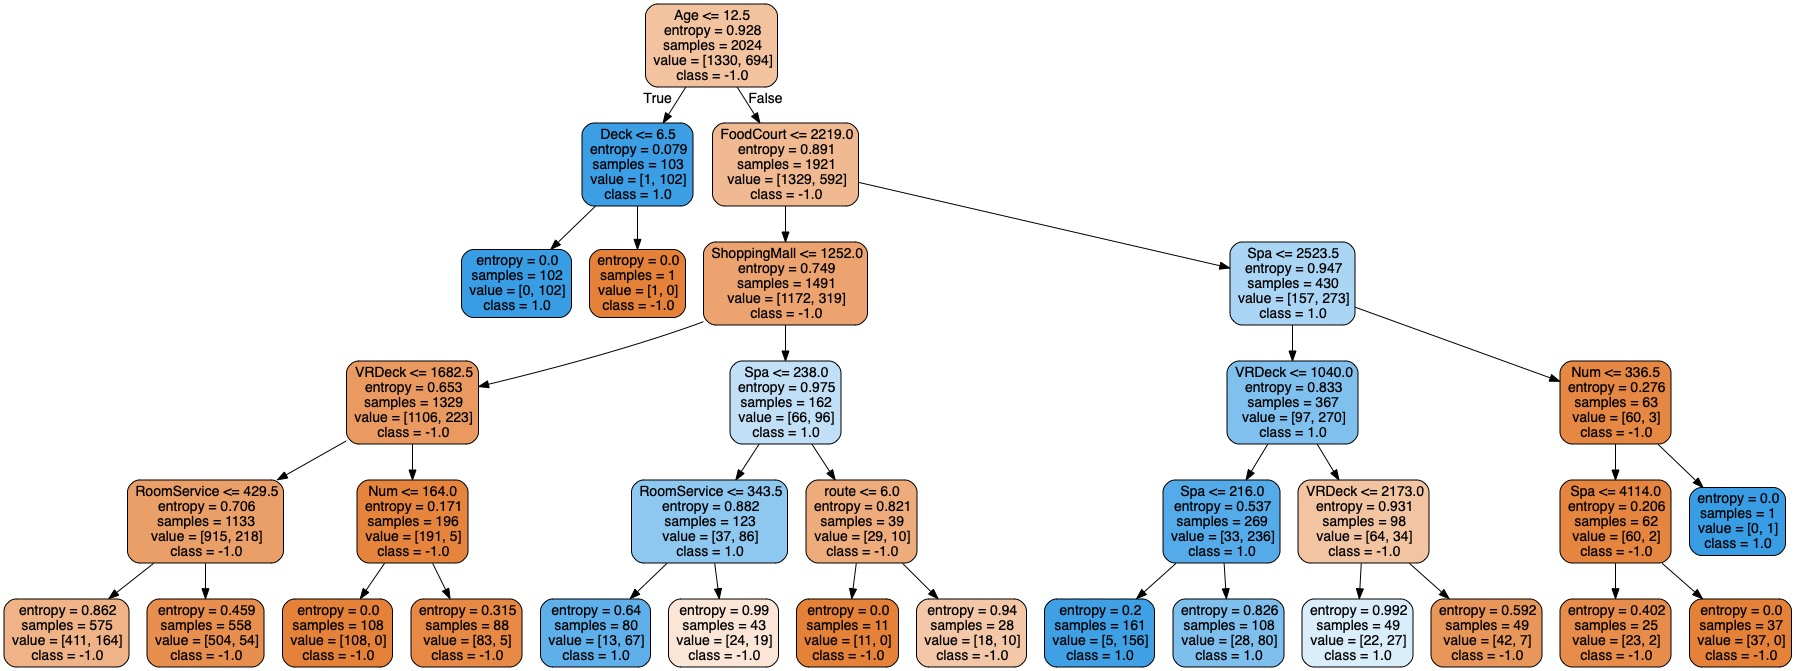

test size:  2024 , total errors in test: 16.25%
index = predicted, columns = factual, in %:
         -1        1
-1  62.3518  12.8953
 1  3.35968  21.3933


In [25]:
features = ['Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Deck','Num','Side','route']
tree = ds.divide_frame(dataf = df_rest,columns = features,teacher_column = "Transported",classifier = 'Tree', criterion_tree = "entropy", depth = 5, random_state_sample = 5,random_state_ppn = 2, fraction = 1)

route > 3.5 & age <= 12.5 & CryoSleep == 0 ==> 1 [1,102]

In [26]:
mask1 = (df['CryoSleep'] == 0)&(df['route']>3.5)&(df['Age']>12.5)
features = ['Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Deck','Num','Side','route']
df_rest1 = df[mask1][features+["Transported"]]
df_rest1.shape

(1921, 12)

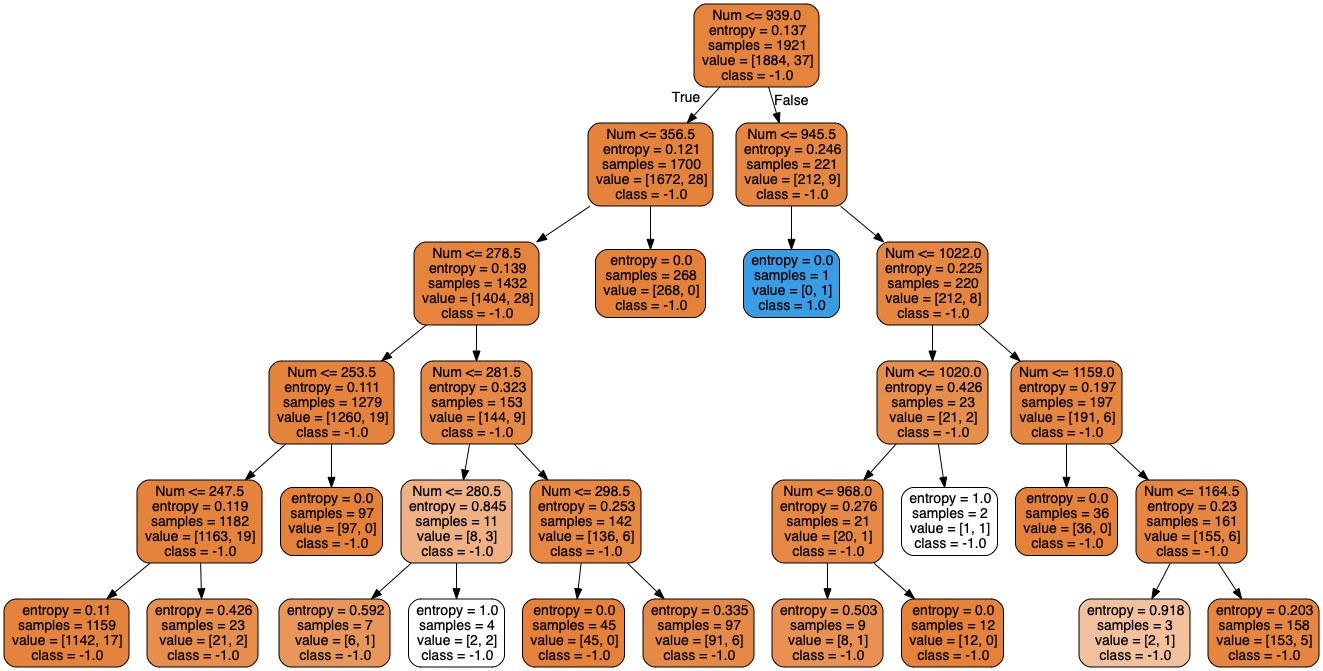

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:203: UserWarning: evaluating in Python space because the '-' operator is not supported by numexpr for the bool dtype, use '^' instead
  warnings.warn(


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [27]:
dz = df_rest1

c = ["Num","VRDeck","FoodCourt","Spa","RoomService","ShoppingMall"]

m1 = dz["VRDeck"].mean() + 3*dz["VRDeck"].std() #Num<=368
m2 = dz["FoodCourt"].mean() + 3*dz["FoodCourt"].std() #<339
m3 = dz["Spa"].mean() + 3*dz["Spa"].std()  #<=318
m4 = dz["RoomService"].mean() + 3*dz["RoomService"].std()  #any
m5 = dz["ShoppingMall"].mean() + 3*dz["ShoppingMall"].std()  #<=310.5 - 2/3 < m4


#dz["Transported"] = df_rest1["VRDeck"]>m1
#dz["Transported"] = df_rest1["FoodCourt"]>m2
#dz["Transported"] = df_rest1["Spa"]>m3
dz["Transported"] = df_rest1["RoomService"]>m4
#dz["Transported"] = df_rest1["ShoppingMall"]>m5


tree = ds.divide_frame(dataf = dz,columns = ["Num"],teacher_column = "Transported",classifier = 'Tree', criterion_tree = "entropy", depth = 5, random_state_sample = 5,fraction = 1)


It  means that if the Num <368 then 80% of each of the VRDeck, FoodCourt and Spa are < 1/10 of max values and within mean *2 

In [ ]:
mask_normal = (df['CryoSleep'] == 0)&(df['route']>3.5)&(df['Age']>12.5)&(df['Num']<=368)
mask_rich = (df['CryoSleep'] == 0)&(df['route']>3.5)&(df['Age']>12.5)&(df['Num']>368)

df_normal = df[mask_normal]
df_normal.drop("CryoSleep",axis = 1, inplace = True)
df_normal.shape

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(1436, 12)

In [ ]:
df_rich = df[mask_rich]
df_rich.drop("CryoSleep",axis = 1, inplace = True)
df_rich.shape

(485, 12)

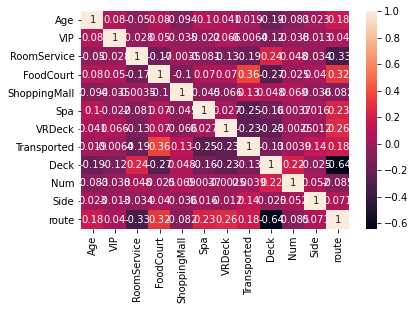

In [ ]:
corrMatrix = df_normal.corr()

sb.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
df_normal.drop(["Num","VIP","Age"],axis = 1,  inplace = True)

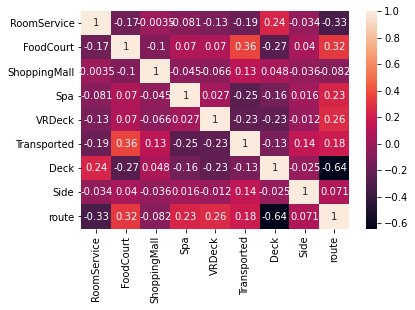

In [ ]:
corrMatrix = df_normal.corr()

sb.heatmap(corrMatrix, annot=True)
plt.show()

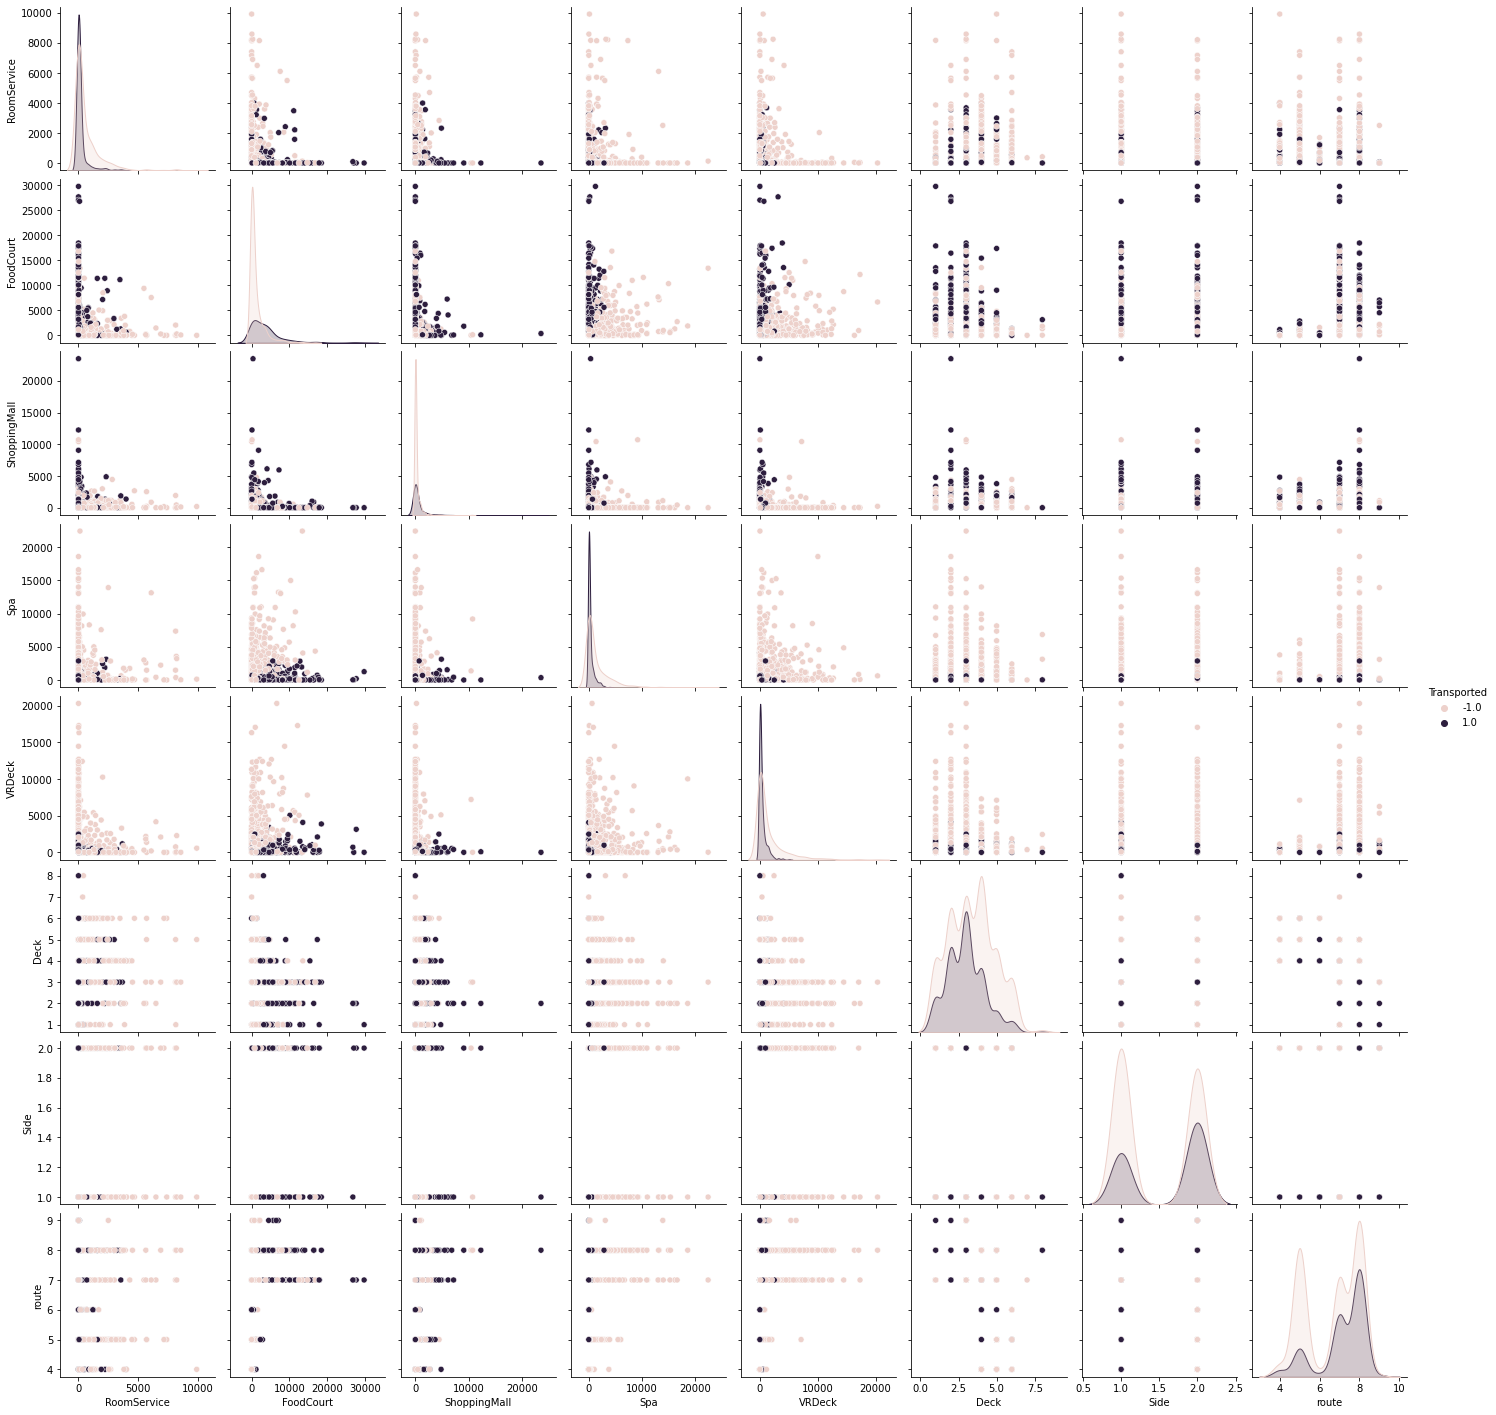

In [ ]:
sb.pairplot(df_normal, hue = "Transported")

In [ ]:
col_s1 = ['FoodCourt','Spa']
dz = df_normal[col_s1+["Transported"]]

x1_mean = dz[col_s1[0]].mean()
x1_sigma = dz[col_s1[0]].std()

x2_mean = dz[col_s1[1]].mean()
x2_sigma = dz[col_s1[1]].std()

for i in dz.index:
    dz.loc[i,col_s1[0]] = (dz.loc[i,col_s1[0]] - x1_mean)/x1_sigma
    dz.loc[i,col_s1[1]] = (dz.loc[i,col_s1[1]] - x2_mean)/x2_sigma


#ppn1 = ds.divide_frame(dz,col_s1,teacher_column = "Transported",classifier = "SVC", kernel_ = "rbf",random_state_sample = 1, random_state_ppn = 1, gamma_ = 0.1, c = 10,  plot = True,res = 0.01)
#ppn1 = ds.divide_frame(dz,col_s,teacher_column = "Transported",classifier = "SVC", kernel_ = "sigmoid",random_state_sample = 1, random_state_ppn = 1, gamma_ = 0.1, c = 11,  plot = True,res = 0.01)
#ppn1 = ds.divide_frame(dz,col_s,teacher_column = "Transported",classifier = "Perceptron",random_state_sample = 1, random_state_ppn = 1, eta = 0.001, iter = 500, plot = True,res = 0.01)
#ppn1 = ds.divide_frame(dz,col_s,teacher_column = "Transported",classifier = "LogisticRegression", random_state_sample = 1, random_state_ppn = 1, eta = 0.001, iter = 500, plot = True,res = 0.01)
#ppn1 = ds.divide_frame(dz,col_s,teacher_column = "Transported",classifier = "KNN",random_state_sample = 1, random_state_ppn = 1, neighbors = 2, dimension=2,  plot = True, res = 0.01)
ppn1 = ds.divide_frame(dz,col_s1,teacher_column = "Transported",classifier = "Tree",random_state_sample = 1, random_state_ppn = 1, criterion_tree  = "entropy", depth = 3, plot = True, res = 0.01)


NameError: name 'df_normal' is not defined

In [ ]:
prediction1 = ppn1.predict(dz.loc[:,col_s1])

pd.value_counts(prediction1)

-1.0    1084
 1.0     352
dtype: int64

From here we try to find other reelations in impure frame

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-29-15d72dce88e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dz.loc[i,col_s2[0]] = (dz.loc[i,col_s2[0]] - x1_mean)/x1_sigma
<ipython-input-29-15d72dce88e3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dz.loc[i,col_s2[1]] = (dz.loc[i,col_s2

test size:  431 , total errors in test: 26.68%
index = predicted, columns = factual, in %:
         -1        1
-1  52.4362  13.2251
 1  13.4571  20.8817
     w =  [ 0.00024345  0.00349084 -0.00053437]


/Users/sergey/Dropbox/GitHub/spaceship/spaceship-1/ds.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr[i] = 0


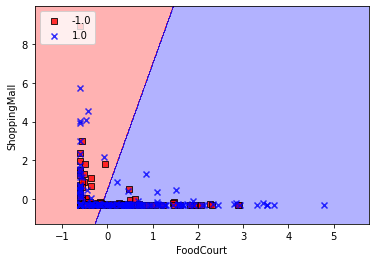

In [ ]:
col_s2 = ['FoodCourt','ShoppingMall']
dz = df_normal[col_s2+["Transported"]]

x1_mean = dz[col_s2[0]].mean()
x1_sigma = dz[col_s2[0]].std()

x2_mean = dz[col_s2[1]].mean()
x2_sigma = dz[col_s2[1]].std()

for i in dz.index:
    dz.loc[i,col_s2[0]] = (dz.loc[i,col_s2[0]] - x1_mean)/x1_sigma
    dz.loc[i,col_s2[1]] = (dz.loc[i,col_s2[1]] - x2_mean)/x2_sigma

#ppn2 = ds.divide_frame(dz,col_s,teacher_column = "Transported",classifier = "SVC", kernel_ = "rbf",random_state_sample = 1, random_state_ppn = 1, gamma_ = 0.1, c = 1,  plot = True,res = 0.01)
#ppn2 = ds.divide_frame(dz,col_s,teacher_column = "Transported",classifier = "SVC", kernel_ = "sigmoid",random_state_sample = 1, random_state_ppn = 1, gamma_ = 1, c = 11,  plot = True,res = 0.01)
ppn2 = ds.divide_frame(dz,col_s2,teacher_column = "Transported",classifier = "Perceptron",random_state_sample = 1, random_state_ppn = 1, eta = 0.001, iter = 500, plot = True,res = 0.01)
#ppn2 = ds.divide_frame(dz,col_s,teacher_column = "Transported",classifier = "Adaline", random_state_sample = 1, random_state_ppn = 2, eta = 0.01, iter = 500, plot = True,res = 0.01)
#ppn2 = ds.divide_frame(dz,col_s,teacher_column = "Transported",classifier = "KNN",random_state_sample = 1, random_state_ppn = 1, neighbors = 3, dimension=2,  plot = True, res = 0.01)
#ppn2 = ds.divide_frame(dz,col_s,teacher_column = "Transported",classifier = "Tree",random_state_sample = 1, random_state_ppn = 1, criterion_tree  = "entropy", depth = 3, plot = True, res = 0.01)


In [ ]:
prediction2 = ppn2.predict(dz.loc[:,col_s2])

pd.value_counts(prediction2)

-1    1123
 1     313
dtype: int64

In [ ]:
pd.value_counts(df_normal["Transported"])

-1.0    951
 1.0    485
Name: Transported, dtype: int64

In [ ]:
prediction = prediction1 + prediction2

prediction /=2

pd.value_counts(prediction)

-1.0    1027
 1.0     256
 0.0     153
dtype: int64

In [ ]:
for i in range(len(prediction)):
    if prediction[i]==0:
        prediction[i]=-1

pd.value_counts(prediction)

-1.0    1180
 1.0     256
dtype: int64

In [ ]:
err = abs(df_normal["Transported"] - prediction)/2

error = 100*pd.value_counts(err)/len(df_normal["Transported"])

error

0.0    76.392758
1.0    23.607242
Name: Transported, dtype: float64

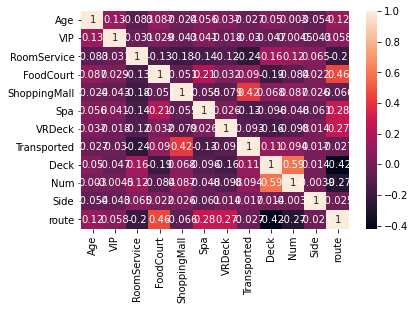

In [ ]:
corrMatrix = df_rich.corr()

sb.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
df_rich.drop(["route","Side","VIP","Age"],axis = 1, inplace = True)

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


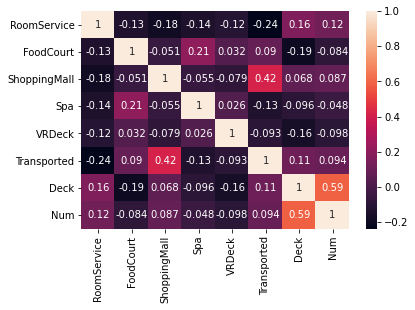

In [ ]:
corrMatrix = df_rich.corr()

sb.heatmap(corrMatrix, annot=True)
plt.show()

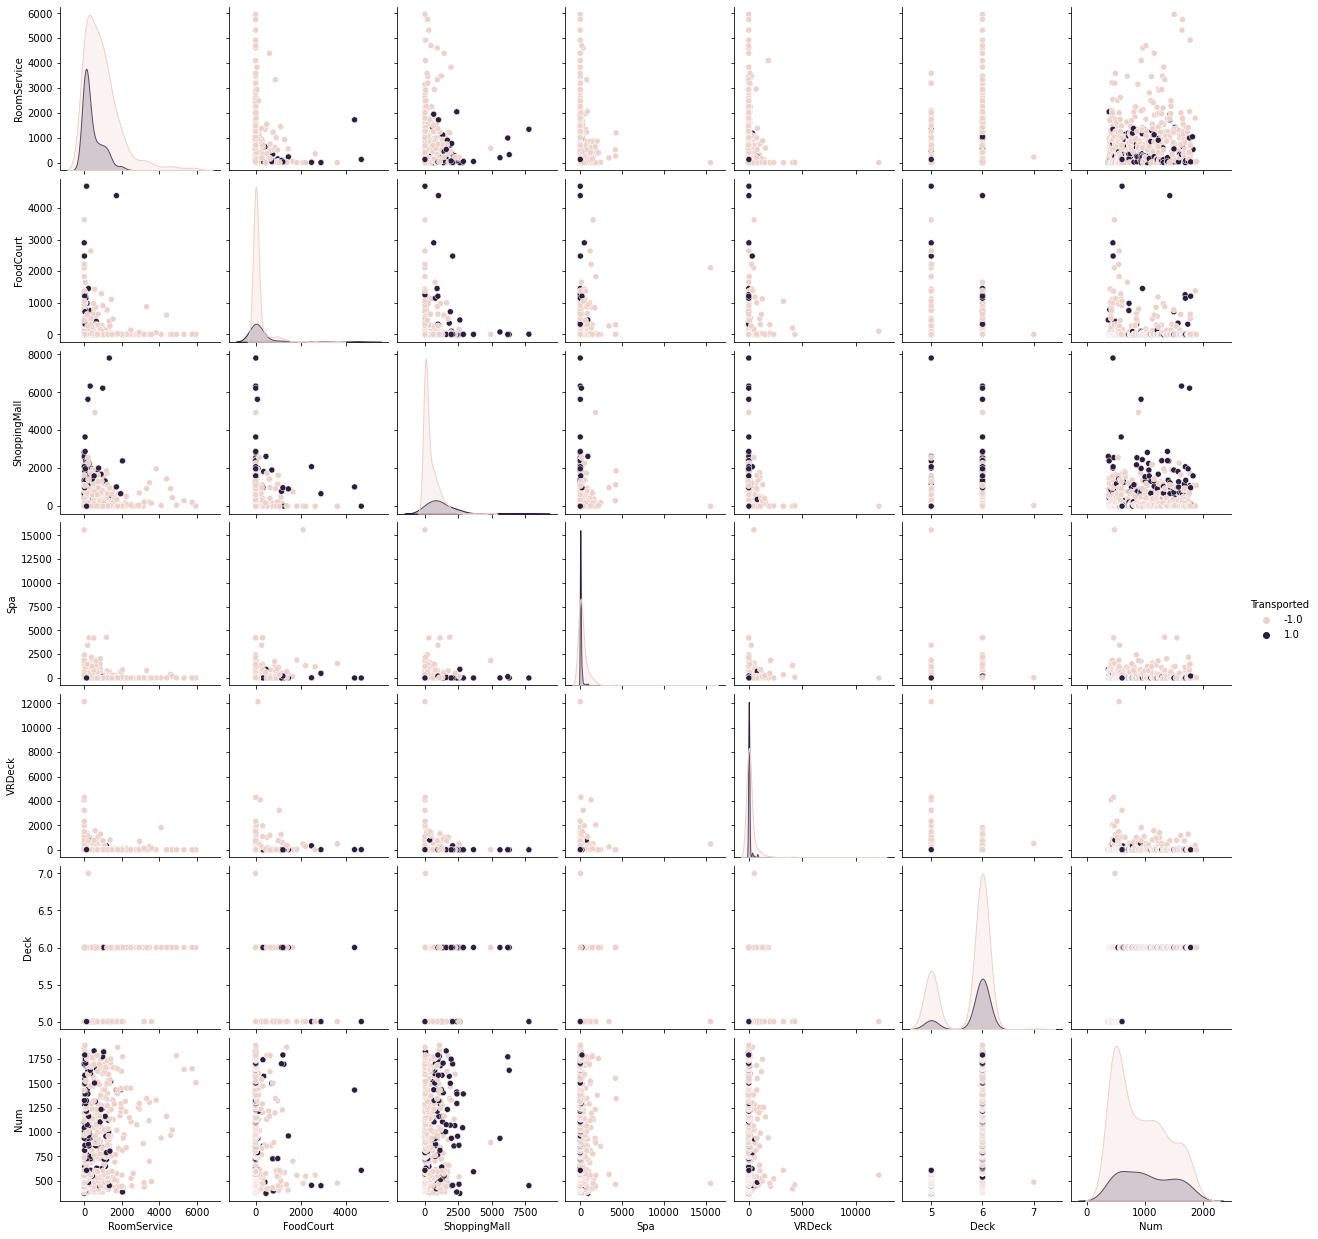

In [ ]:
sb.pairplot(df_rich,hue="Transported")

In [ ]:
df_rich[df_rich["Transported"]==1].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num
count,107.000000,107.000000,107.000000,107.000000,107.00000,107.0,107.000000,107.000000
mean,411.074766,236.504673,1253.355140,48.065421,33.28972,1.0,5.850467,1028.953271
std,487.506027,750.233013,1321.168952,131.551143,128.65597,0.0,0.358291,444.221120
min,0.000000,0.000000,0.000000,0.000000,0.00000,1.0,5.000000,371.000000
25%,38.500000,0.000000,479.000000,0.000000,0.00000,1.0,6.000000,616.000000
50%,197.000000,0.000000,973.000000,0.000000,0.00000,1.0,6.000000,958.000000
75%,660.000000,13.500000,1596.000000,21.000000,0.00000,1.0,6.000000,1422.000000
max,2042.000000,4688.000000,7810.000000,912.000000,800.00000,1.0,6.000000,1834.000000


In [ ]:
df_rich[df_rich["Transported"]==-1].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.0,378.000000,378.000000
mean,937.550265,129.457672,388.084656,333.595238,188.515873,-1.0,5.730159,927.719577
std,983.327269,390.900721,548.801465,990.472897,779.268062,0.0,0.450394,444.240909
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0,5.000000,376.000000
25%,194.250000,0.000000,8.000000,0.000000,0.000000,-1.0,5.000000,524.500000
50%,733.000000,0.000000,142.500000,2.000000,0.000000,-1.0,6.000000,856.000000
75%,1278.000000,10.750000,635.750000,354.500000,23.000000,-1.0,6.000000,1254.750000
max,5959.000000,3624.000000,4940.000000,15586.000000,12143.000000,-1.0,7.000000,1892.000000


In [ ]:
prediction = [i > 900 for i in df_rich["ShoppingMall"]]

prediction

[False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 Fals

In [ ]:
for i in range(len(prediction)):
    if prediction[i] == False:
        prediction[i] = -1.0
    else:
        prediction[i] = 1.0

err = abs(df_rich["Transported"] - prediction)/2

error = 100*pd.value_counts(err)/len(df_rich["Transported"])

error

0.0    77.525773
1.0    22.474227
Name: Transported, dtype: float64

In [ ]:
dataf = df[df['route']<=3.5]

dataf.shape

(4132, 13)

In [ ]:
pd.value_counts(dataf["Transported"])

-1.0    2335
 1.0    1797
Name: Transported, dtype: int64

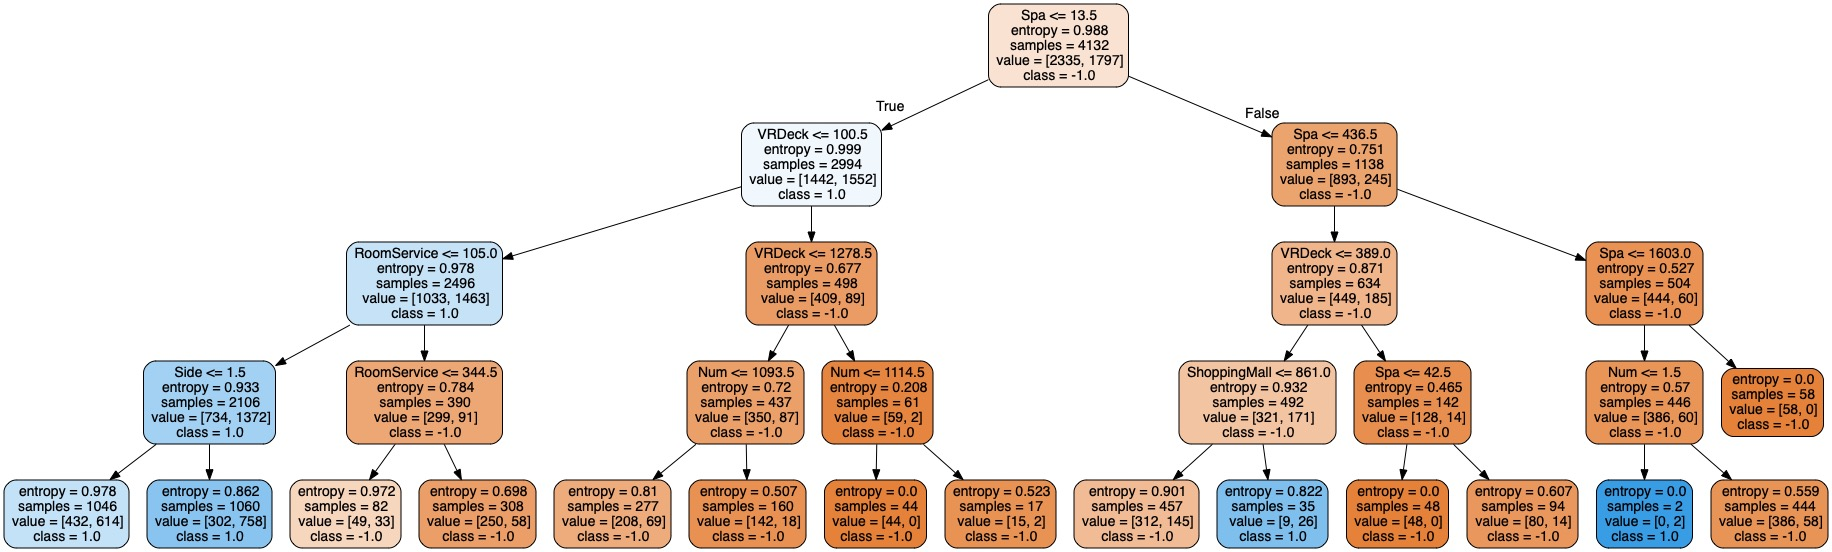

test size:  4132 , total errors in test: 27.59%
index = predicted, columns = factual, in %:
         -1        1
-1  38.5286  9.60794
 1  17.9816  33.8819


In [ ]:
features = ['Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Deck','Num','Side','route']

tree = ds.divide_frame(dataf, columns = features, teacher_column = "Transported",classifier = 'Tree', criterion_tree = "entropy", depth = 4, random_state_sample = 5,random_state_ppn = 2, fraction = 1)